# 순환 신경망 - 나비야
- 출처 : https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/

In [1]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [2]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [3]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
dataset = seq2dataset(seq, window_size = 4)

dataset.shape

(50, 5)

In [4]:
dataset[:5]

array([[11,  9,  2, 10,  8],
       [ 9,  2, 10,  8,  1],
       [ 2, 10,  8,  1,  7],
       [10,  8,  1,  7,  8],
       [ 8,  1,  7,  8,  9]])

### 학습과정
- 파란색 박스가 입력값이고, 빨간색 박스가 우리가 원하는 출력값
- 1~4번째 음표를 데이터로 5번째 음표를 라벨값으로 학습을 시킴
- 다음에는 2~5번째 음표를 데이터로 6번째 음표를 라벨값으로 학습을 시킴
- 이후 한 음표씩 넘어가면서 노래 끝까지 학습시킴

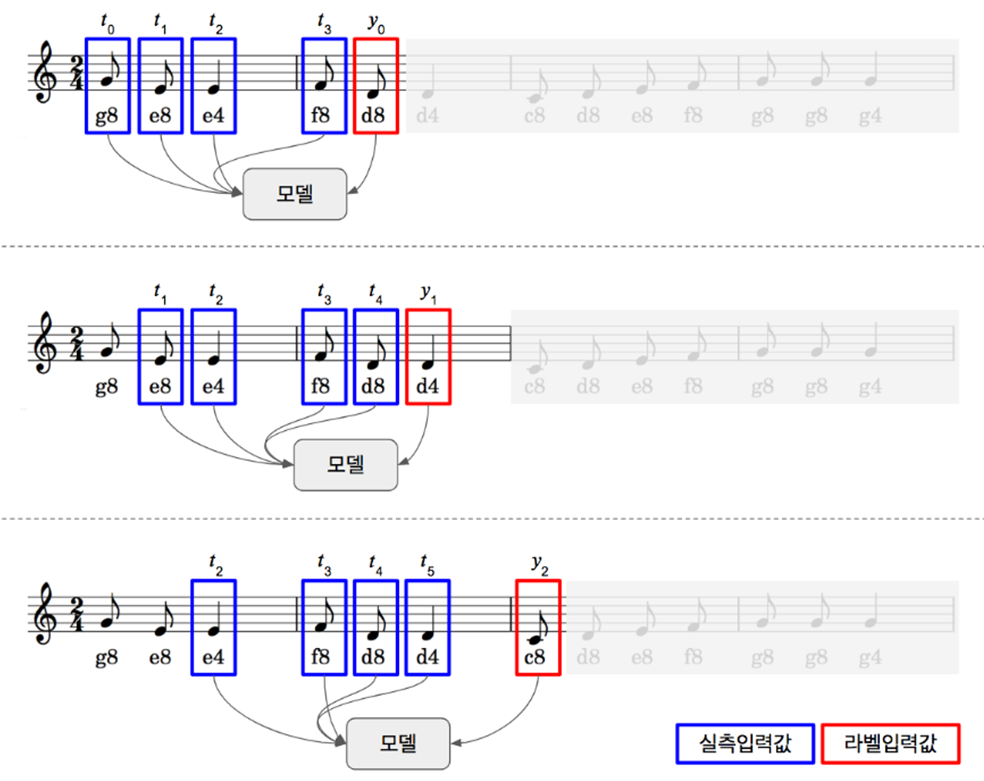

### 예측과정

### 한 스텝 예측
- 모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옴
- 모델에 t1, t2, t3, t4를 입력하면 y1 출력이 나옴
- 모델에 t2, t3, t4, t5를 입력하면 y2 출력이 나옴
- 이 과정을 y49 출력까지 반복

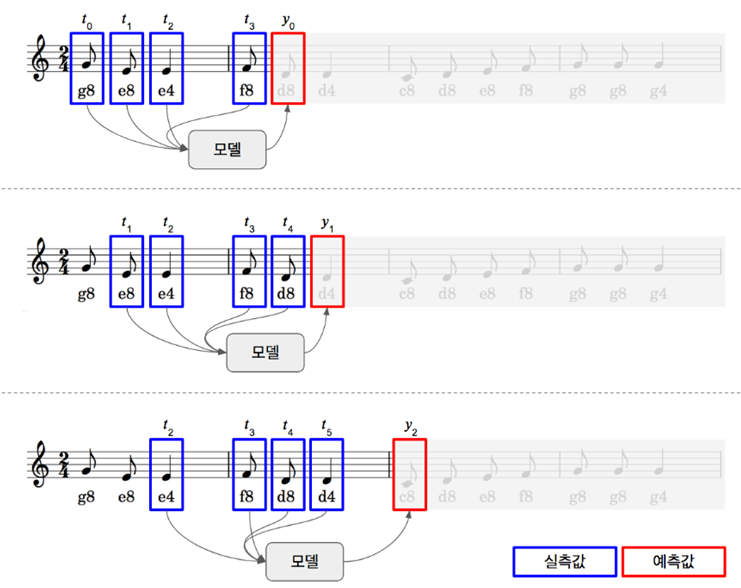

### 곡 전체 예측
- 모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옴
- 예측값인 y0를 t4라고 가정하고, 모델에 t1, t2, t3, t4을 입력하면 y1 출력이 나옴
- 예측값인 y1을 t5라고 가정하고, 모델에 t2, t3, t4(예측값), t5(예측값)을 입력하면 y2 출력이 나옴
- 이 과정을 y49 출력까지 반복

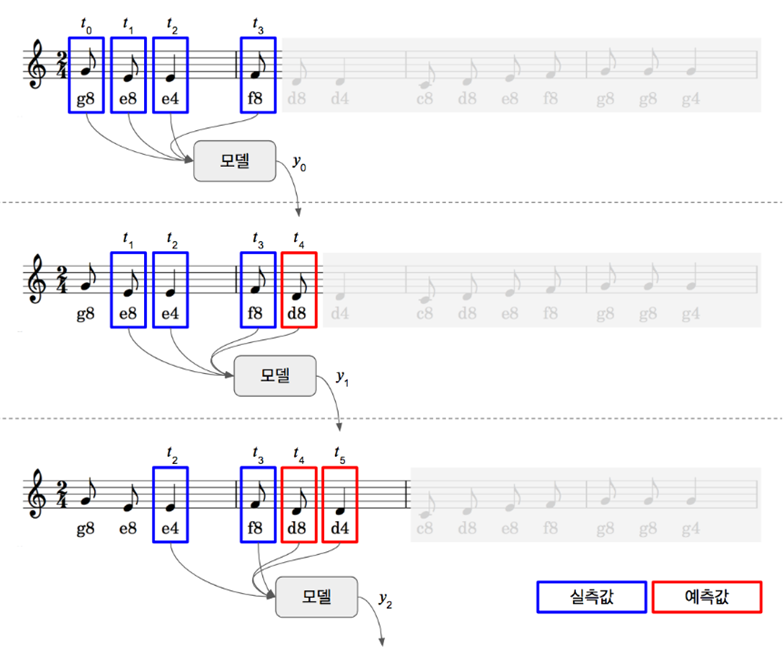